#### Fluid flow model of the queue for shelter and housing

Here we ignore the randomness in the arrival process and the service process for homeless people entering and leaving the homeless response system. Instead we assume that ``fluid" flows into the system continuously at a rate $\lambda(t)$ and flows out a  rate $\mu(t) = \mu_{0}c_{h}(t)$ where $\mu_{0}$ is the service rate of a single housing unit and $c_{h}(t)$ is the number of houses at time $t$. The simplification of the service process relies on the assumption that the servers are always busy. Given a house building rate of $h(t)$, we can calculate $c_{h}(t)$ as: 

$c_h(t) = c_{h0} + \int_{0}^{t} h(t) dt$

where $c_{h0}$ is the initial number of houses in the system. At time $t$ we can calculate the number of people $N(t)$ in the system as:

$N(t) = N_0 + \int_{0}^{t} \lambda(t) - \int_{0}^{t} \mu(t)$.

We split the queue for housing into an unsheltered and a sheltered part. We denote $c_{s}(t)$ as the number of shelters at time $t$. Given a server building rate of $s(t)$, we can calculate $c_{s}(t)$ as:

$c_s(t) = c_{s0} + \int_{0}^{t} s(t) dt$. The size of the unsheltered queue at time $t$ is then: 

$unsh(t) = N(t) - c_h(t) - c_s(t)$

where we assume that build rates $h(t)$ and $s(t)$ are sufficiently small for the given arrival rate $\lambda(t)$ so that the expression above for $unsh(t)$ never drops below $0$. The purpose of this assumption is to ensure that an objective function which includes $unsh(t)$ does not involve an expression containing a maximisation (e.g. $\max(0,N(t)-c_h(t)-c_s(t))$). 

We can use this deterministic model to estimate statistical variability using: 

$E[unsh(t)] = N_0 + \int_{0}^{t} \lambda(t) - \int_{0}^{t} \mu(t)$ - c_h(t) - c_s(t)$

$Var[unsh(t)] = \int_{0}^{t} \lambda(t) + \int_{0}^{t} \mu(t)$

where the latter expression assumes exponential inter-arrival and service times. The above expressions can then help us calculate squared queue lengths: 

$E[unsh(t)^2] = E[unsh(t)]^2 + Var[unsh(t)]$. 


In [1]:
import fluid_flow_model as fl
import json
import matplotlib.pyplot as plt

In [2]:
# Opening JSON file
with open('data_as_is.json') as json_file:
    data_as_is = json.load(json_file)

In [4]:
model = fl.FluidFlowModel(data_as_is, data_as_is['build_rates'])

In [5]:
horizon = 5
T = [i/365 for i in range(int(horizon*365))]
model.analyse(T)

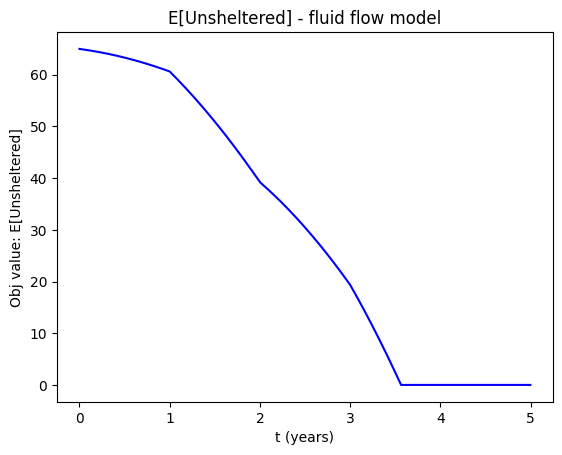

In [6]:
plt.plot(T, model.unsh_t, color = 'blue')
plt.title('E[Unsheltered] - fluid flow model')
plt.xlabel('t (years)')
plt.ylabel('Obj value: E[Unsheltered]')
plt.show()

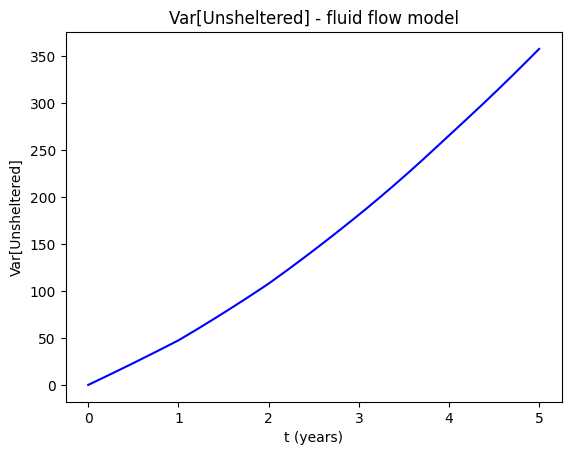

In [7]:
plt.plot(T, model.unsh_var_t, color = 'blue')
plt.title('Var[Unsheltered] - fluid flow model')
plt.xlabel('t (years)')
plt.ylabel('Var[Unsheltered]')
plt.show()

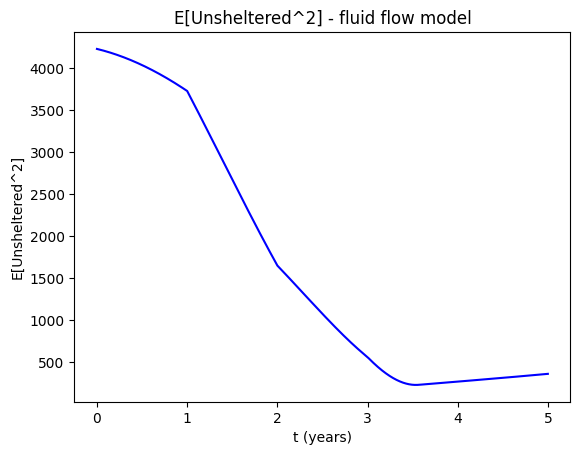

In [8]:
plt.plot(T, model.unsh_sq_t, color = 'blue')
plt.title('E[Unsheltered^2] - fluid flow model')
plt.xlabel('t (years)')
plt.ylabel('E[Unsheltered^2]')
plt.show()